In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#this tutorial will be using CNN to classify Cifar images 
from __future__ import print_function , division,unicode_literals,absolute_import 
from tensorflow.keras import models,datasets,layers

In [4]:
#this dataset have 60,000 images which are divided into 10 classes 
#it is having 6,000 images in each of the classes
#dataset is divided into 50,000 training images and 10,000 test images , there is no overlap(mutually exclusive classes)

In [6]:
(train_images,train_labels) , (test_images,test_labels) = datasets.cifar10.load_data()

#normalizing the pixel values 
train_images = train_images/255.0
test_images = test_images/255.0

170500096/170498071 [==============================] - 239s 1us/step


(50000, 32, 32, 3)
(10000, 32, 32, 3)


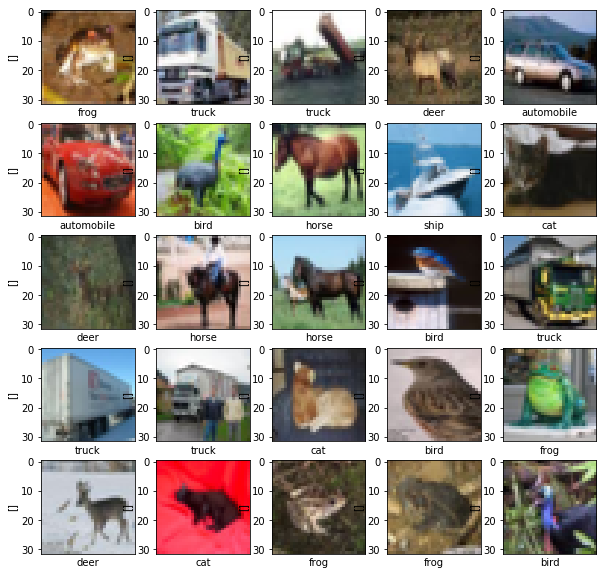

In [9]:
print(train_images.shape)
print(test_images.shape)
class_names = ["airplane","automobile","bird","cat","deer" , "dog","frog","horse","ship","truck"]
# now verifying the data , plotting the images and displaying their classnames 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) #this is the list of the position on  x where ticks need to be placed
    plt.ylabel([])
    plt.grid(False)
    plt.imshow(train_images[i] , cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [10]:
train_labels.shape

(50000, 1)

In [14]:
#the traing_labels is a array of 50,000 numbers representing the classes to which the images belong
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(32,(5,5) , activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64,(3,3) , activation='relu'))

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [16]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          18496     
Total params: 45,024
Trainable params: 45,024
Non-trainable params: 0
_________________________________________________________________


In [18]:
#to classify the dataset into 10 classes we need some more dense classes at the top
#dense layers take the vectors(1-D) as inputs while the current output is 3-D
#so we need to flatten them first
model1.add(layers.Flatten())
model1.add(layers.Dense(64,activation='relu'))
model1.add(layers.Dense(10))

In [19]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [21]:
#now fitting the model to the dataset (deciding the optimizer and loss function)
model1.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
first_cnn = model1.fit(train_images,train_labels,epochs=15,validation_data = (test_images,test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 69s 1ms/sample - loss: 1.6046 - acc: 0.4097 - val_loss: 1.3269 - val_acc: 0.5195
Epoch 2/15
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.2887 - acc: 0.5348 - val_loss: 1.2082 - val_acc: 0.5677
Epoch 3/15
50000/50000 [==============================] - 67s 1ms/sample - loss: 1.1728 - acc: 0.5810 - val_loss: 1.2130 - val_acc: 0.5696
Epoch 4/15
50000/50000 [==============================] - 66s 1ms/sample - loss: 1.0944 - acc: 0.6094 - val_loss: 1.1109 - val_acc: 0.6048
Epoch 5/15
50000/50000 [==============================] - 66s 1ms/sample - loss: 1.0334 - acc: 0.6342 - val_loss: 1.0559 - val_acc: 0.6290
Epoch 6/15
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.9764 - acc: 0.6552 - val_loss: 1.0492 - val_acc: 0.6295
Epoch 7/15
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.9362 - acc: 0.6704 - val_loss: 0.

In [30]:


test_loss,test_accuracy = model1.evaluate(test_images,test_labels,verbose=2)


10000/10000 - 3s - loss: 0.9907 - acc: 0.6615


In [31]:
#so it can be seen the model has overfitten our training dataset that's why it is unable to generalize well on new dataset